# Artificial Intelligence and Machine Learning - Coursework 1 - 1st diet
# Module ID : MMI226824
## Air quality dataset
# Student Name: Arjun Paudel
# Student Email: APAUDE300@caledonian.ac.uk
# Student ID Number : S2271954
I confirm that the material contained within the submitted coursework is all my own work unless otherwise stated below.

---

## 1. Introduction and Problem Definition


### Overview of the data
Air quality dataset is the combination of 7358 obesrvation recorded on an hourly basis averaged response from the array of five metal-oxide checmical sensors embedded in an air quality chemical multi_sensor devices. And these device were located on polluated area at road level of an Itallian city. And the range of this data was collected within year from 2004 to 2005.

List of all the ground truth devices
 1. CO(GT) = Hour averaged CO concentration in mg/m^3
 2. NMHC (GT)= Hour averaged NMHC concentration in microg/m^3
 3. C6H6(GT)= Hour averaged C6H6 concentration in microg/m^3
 4. NOx(GT)= Hour averaged NOx concentration in ppb
 5. NO2 (GT)= Hour averaged NO2 concentration in microg/m^3
 
List of all the raw sensor devices
1. PT08.S1(CO) = Hourly averaged sensor response (CO Targeted)
2. PT08.S2(NMHC) = Hourly averaged sensor response (NMHC Targeted)
3. PT08.S3(NOx) = Hourly averaged sensor response ( NOxTargeted)
4. PT08.S4(NO2) = Hourly averaged sensor response (NO2 Targeted)
5. PT08.S5(O3) = Hourly averaged sensor response (O3 Targeted)

List of other variables in dataset
1. Data = In day monthe and year format
2. Time = In HH:MM:SS format
3. T(C) = Temperature in degree celsius
4. RH = Relative Humidity
5. AH = Absolute Humidity

### Problem Type Discussion

For the task 1 regression model is used whereas in taks 2 classification model of machine learning is used.
1. Regression model : Regression in machine learning is a supervised learnig task where the aim is to predict a continious values. In task 1, regression model is used because the goal of task 1 is to predict the continious value of CO. 
2. Classification Model: Classification in machine learning is a also supervised learning task where the aim is to predict a values in categorize or a discreate values. In task 2, classification model is used because the goal of task 2 is to predict the value from the categorical variable.

### Detailed Problem Statement
There are two task to complete on this coureswork and which problem statement are described seperately below:

1. Task 1: **Predicting the CO Concentration**. The main task of this work is to build a model to predict the CO concentration by the help of other variables that is sensor response, data, time. And also the temperature and humidity of surrounding play an vitral role for CO concentration, so these variable are also going to be used to make the prediction model.

2. Task 2 : **Predicting Own Air Quality Index**. The main task for this work is to define the own air quality index by combing all the ground truth values of several gases and use the machine learning model to predict the air quality index from the different raw sensor readings and other column of intreast like time, data , temperature and humidity. Here All the ground truth values are not used in model to predict result.

## 2. Data ingestion


### Importing Necessary Libraries

In [332]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Loading Dataset


In [333]:
#load the dataset
df = pd.read_csv("./AirQuality.csv")

#displaying few rows of dataframe
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NaN,NaN


### Description of Statistical Data

In [334]:
#details info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T(C)           9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(7), int64(8), object(2)
memory usage: 1.2

This code **df.info()** is used to show all the details of the dataset. It shows that the total number of obeservation and column that are in the dataset. Also it show the type of these variable and also the count of Null values in out entire dataset. To know more details statistical summary of each numeric column then **df.describe** code is used as following.

In [335]:
#describe all the numeric statistical variables
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-33.970097,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.458405,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


## 3. Data preparation (common to both tasks)


Data preparation is an important part of machine learning pipeline. In this task, common data is prepared for the both task, but further in-depth data preparation will be done in the next chapter for each specific task according to the model design.

There are two two column which are completely empty in the dataframe which has to be removed first.

In [336]:
#removing two variables that are empty
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

From  the exploratory data analysi it has been confirmed that the due to the malfunction of sensor device the values are indicate as ** -200** nor as NAN. So to get the better result these values should be transfer to NAN values and then further step will be taken to handle these values.

In [337]:
# Replacing -200 values as NAN values 
df = df.replace(-200, np.nan)

Now if null values were check it will show the exact number of null values in the dataset

In [338]:
# seeing null values
df.isnull().sum()

Date                0
Time                0
CO(GT)           1672
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T(C)              366
RH                366
AH                366
dtype: int64

These null values will be handled accordingly to the two different task which will comes later, That's why it is left out without doing anything.

Now next task is to create a two variable that is **PeakTime** and **ValleyTime** which will indicate the peak hour of road usage. And the condition for this is 
1. **PeakTime** : On working days 8 AM - 12 AM and 6 PM - 10 PM. On Non-working days 9 AM - 12 AM.
2. **ValleyTime** : During Night 2 AM - 6 AM.

So to create these variable first new variable should be created which will show the wheather it is working days or non working days as **DayOfWeek**

In [339]:
#creating dayofweek variable
df["DayOfWeek"] = pd.to_datetime(df["Date"], dayfirst=True).dt.day_name()

In [340]:
#creating the new variable whether it  is peak time or valley time

#extracting hour from the time variable
hour_df = pd.to_datetime(df["Time"], format='%H:%M:%S').dt.hour

#creating peaktime variable and save the result as a integer value that is 1 and 0.

df['PeakTime'] = ((hour_df.between(8, 12) | hour_df.between(18, 22)) & 
                   (df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']) |
                    (hour_df.between(9, 12) &
                     (df['DayOfWeek'].isin(['Saturday', 'Sunday']))))).astype(int)


#creating valleytime variable and save the result as a integer value that is 1 and 0.

df['ValleyTime'] = hour_df.between(2, 6).astype(int)



This above mentioned code will create a two variable and save the result a integer that is if it is peak time or valley time it will save the result as 1 if not 0.

Now let see the dataframe how it looks like.

In [341]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,1,0
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,1,0
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,1,0
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,1,0
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,1,0


# TASK 1: CO concentration prediction


The main aim of this task is to predict the CO concentration with the help of CO sensor reading, time, day of the week. Further temperature and humidity data is also used to predicit the better results. To predicit the result here regression model of machine learning is used. On regression model also Decision Tree Regressor is used to predict the data because the target data is in continious form.

## 4. Further Data Preparation and Data Segregation (specific for this task)


### Further Data Preparation


Dropping those variables that are not used in this task

In [342]:
# Dropping the unwanted variables from the previous dataframe and save it into new dataframe that is task1_df
task1_df = df.drop(columns=[ 'Date','NMHC(GT)','C6H6(GT)', 'PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)'])
task1_df.head(1)

,Time,CO(GT),PT08.S1(CO),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime
0,18:00:00,2.6,1360.0,13.6,48.9,0.7578,Wednesday,1,0


Now all the missisng value that was occured in this new dataframe will be handle. For this first check the total null values.

In [343]:
# seeing null values
task1_df.isnull().sum()

Time              0
CO(GT)         1672
PT08.S1(CO)     366
T(C)            366
RH              366
AH              366
DayOfWeek         0
PeakTime          0
ValleyTime        0
dtype: int64

It show that there is a huge missing values in five variables, which has to be handle properly to get the better result from our model. So to handle all the values first we  calculate the median by grouping two variable that is **PeakTime and ValleyTime**. That means this method will give the median values for three different condition and these condition are:
1. When Peak time is True that is 1 and ValleyTime false that is 0.
2. When Peak time is False that is 0 and ValleyTime false that is 0.
3. When Peak time is False that is 0 and ValleyTime True that is 1.

First let find the median values by grouping two variables.

In [344]:
#seeing the median values on different condition
meadiandata = task1_df.groupby(by=['PeakTime', 'ValleyTime']).median(numeric_only=True)
meadiandata

CO(GT)  PT08.S1(CO)  T(C)    RH      AH
PeakTime ValleyTime                                         
0        0              1.8       1075.5  18.8  46.2  0.9906
         1              0.7        899.0  14.6  60.1  1.0027
1        0              2.7       1179.5  18.8  45.8  0.9971

Now it's time to put these median values into our dataframe which has the missng values as NAN.

In [345]:
#replacing missing values with the median values by grouping two variables

task1_df['CO(GT)'] = task1_df['CO(GT)'].fillna(task1_df.groupby(by=['PeakTime', 'ValleyTime'])['CO(GT)'].transform('median'))
task1_df['PT08.S1(CO)'] = task1_df['PT08.S1(CO)'].fillna(task1_df.groupby(by=['PeakTime', 'ValleyTime'])['PT08.S1(CO)'].transform('median'))
task1_df['T(C)'] = task1_df['T(C)'].fillna(task1_df.groupby(by=['PeakTime', 'ValleyTime'])['T(C)'].transform('median'))
task1_df['RH'] = task1_df['RH'].fillna(task1_df.groupby(by=['PeakTime', 'ValleyTime'])['RH'].transform('median'))
task1_df['AH'] = task1_df['AH'].fillna(task1_df.groupby(by=['PeakTime', 'ValleyTime'])['AH'].transform('median'))



After sucessfull replace of missing values confirm whether do we still have the missing values in our data.

In [346]:
# checking total null values
task1_df.isna().sum()

Time           0
CO(GT)         0
PT08.S1(CO)    0
T(C)           0
RH             0
AH             0
DayOfWeek      0
PeakTime       0
ValleyTime     0
dtype: int64

Here the dataframe that is going to predict the model for the task 1 is null value free. From here the one of the most important step of machine learning pipeline that data segregation will start.

### Data segregation


Here the time filed can not  be directly passed to predit the model, so for that changing time values into the hour value only and droping of Time variable from the dataframe.

In [347]:
# Creating a new variable Hour which take only the  hour value from the Time variable
task1_df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

#droping time column
task1_df = task1_df.drop('Time',axis=1)

#output of new dataframe
task1_df.head(1)

,CO(GT),PT08.S1(CO),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime,Hour
0,2.6,1360.0,13.6,48.9,0.7578,Wednesday,1,0,18


#### Data Encoding

In our dataframe DayOfWeek variable is  categorical data so before putting our data into the machine learning training and testing phase so to change it into the numeric forms run the following code.

In [348]:
#encoding of data from DayofWeek Variables
task1_encoding = ["DayOfWeek"]
for f in task1_encoding:
    task1_encoded = pd.get_dummies(task1_df[f], prefix=f)
    task1_df = pd.concat([task1_df, task1_encoded], axis=1)
    task1_df = task1_df.drop(columns=[f])

This code uses is used to  convert categorical data in the "DayOfWeek" column into binary columns, creating dummy variables for each unique value. The original "DayOfWeek" column is then dropped, leaving the dataframe task1_df with the encoded representation of days of the week.

In [349]:
#selecting the column that start with DayOfWeek
task1_encoded_columns = task1_df.columns[task1_df.columns.str.startswith("DayOfWeek")]

# Convert only the one-hot encoded columns to integers
task1_df[task1_encoded_columns] = task1_df[task1_encoded_columns].astype(int)

This code is used to select the column in our dataframe that start with letter DayOfWeek and change the booleans values into integer value.

In [350]:
task1_df.head()

,CO(GT),PT08.S1(CO),T(C),RH,AH,PeakTime,ValleyTime,Hour,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2.6,1360.0,13.6,48.9,0.7578,1,0,18,0,0,0,0,0,0,1
1,2.0,1292.0,13.3,47.7,0.7255,1,0,19,0,0,0,0,0,0,1
2,2.2,1402.0,11.9,54.0,0.7502,1,0,20,0,0,0,0,0,0,1
3,2.2,1376.0,11.0,60.0,0.7867,1,0,21,0,0,0,0,0,0,1
4,1.6,1272.0,11.2,59.6,0.7888,1,0,22,0,0,0,0,0,0,1


Now the dataframe is ready for the splitting it for the training and testing phase.

#### Data Splitting

Data splitting is process of splitting dataframe into two parts, where one part is for tranning the model and another is for testing the model.
But before splitting the dataframe we have to decide which have to be the taget variable. So for this run the following

In [351]:
# Deciding the target variables 
x1 = task1_df.drop(columns=['CO(GT)'])
y1 = task1_df['CO(GT)']

This code separates a dataframe task1_df into two parts. The variable x1 contains all the columns of task1_df except for 'CO(GT)', and the variable y1, on the other hand, specifically holds the values from the 'CO(GT)' column, creating a target variable for a model.

For splitting the data into testing and traning phase here we used the 'train_test_split' function from the 'model_selection' modules within the scikit_learn library which we already import at first phase of the work.

In [352]:
# Deciding the testing and training data 
x_train,x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.20,random_state=42)

This code uses the train_test_split function from a machine learning library scikit-learn. It splits the dataset into training and testing sets for both features (x1) and target variables (y1). The test_size parameter indicates that 20% of the data will be used for testing, and random_state=42 ensures reproducibility by fixing the random seed.

## 5. Model definition and training


###  Decision Tree Regressor Model
Desision Tree Regressor model is a machine learning model used for the regression task. This model split the dataset into the subsets based on the most unique attribute at each step. And this model always predict a continious numerical value for every task.

### Training and Testing

First the model will train by using the training values and with the helps of those value it will used to predict the value for testing.

In [353]:
# Training model with the help of DecisionTreeRegressor model
task1_model = DecisionTreeRegressor(random_state=42)
task1_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

This model is used to train by using DecisionTreeRegressor model where random_state is the randommness to involve in the training process is reproducible and the main goal of this model is used to produce the continious output. This modle is used to train by fit method where x_train is training data input features and y_train is the corresponding tatget output values.

In [354]:
#making prediction using testing set
y_predictions = task1_model.predict(x_test)

This code takes the trained "task1_model," which is a decision tree regression model, and uses it to make predictions on a set of input features represented by x_test. The predict method is applied to the model, and the resulting y_predictions variable stores the predicted output values corresponding to the input features in x_test. Essentially, it's using the trained model to estimate what the model believes the output would be for the given test inputs

## 6. Model evaluation
By the following the evaluation of model can be done.

In [355]:
#modle evaluation
message1 = mean_squared_error(y_test, y_predictions)
print('Decision Tree Mean Squared Error is:', message1)


Decision Tree Mean Squared Error is: 0.7739531027421652


In this code, the mean squared error (MSE) between the actual target values (y_test) and the predicted values (y_predictions) is calculated using the mean_squared_error function. The resulting MSE is stored in the variable message1. Finally, the value of message1 is displayed, providing the MSE for the predictions made by the decision tree regression model on the test data.

# TASK 2: Air Quality Index creation and prediction


The main aim of this task is to predicit the air quality index with the help of sensor reading, time, day of the week. Further temperature and humidity data is also used to predicit the better results. But at first air quality index should by define by ourself with the help of different ground truth values. After calculating the air quality index values, those values are label with the uniques number like 0,1,2,3,4,5 which means good, moderate, unhealthy for sensitive groups, unhealthy, very unhealthy, and hazardous and store it into the new variables 'AirQualityLabel'. And later stage the model was trained to predict this 'AirQualityLabel' with the help of Decision tree classifer model. Here Decision tree classifer model is used becasue the target variable is in categorical forms.

## 4. Further Data preparation (specific for this task)


### Further Data Preparation

Saving the main dataframe into the dataframe that is specially used on this taks 2.

In [356]:
#make seperate dataframe for task 2
task2_df = df
task2_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,1,0
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,1,0
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,1,0
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,1,0
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,1,0


Here in this task we have to define our own Air Quality Index from the ground truth reading values of different gases. For that first the null values should be handled. 

Checking the null values 

In [357]:
task2_df.isna().sum()

Date                0
Time                0
CO(GT)           1672
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T(C)              366
RH                366
AH                366
DayOfWeek           0
PeakTime            0
ValleyTime          0
dtype: int64

Here almost all the numeric values variables has the null values, so all the null values are handled as we handle the null values in task 1 that is first we calculate the median by grouping two variable that is PeakTime and ValleyTime. That means this method will give the median values for three different condition and these condition are:

1. When Peak time is True that is 1 and ValleyTime false that is 0.
2. When Peak time is False that is 0 and ValleyTime false that is 0.
3. When Peak time is False that is 0 and ValleyTime True that is 1.

First let find the median values by grouping two variables.

In [358]:
#seeing the median values on different condition
meadiandata2 = task2_df.groupby(by=['PeakTime', 'ValleyTime']).median(numeric_only=True)
meadiandata2

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
PeakTime ValleyTime                                                           
0        0              1.8       1075.5     151.0       8.5          918.5   
         1              0.7        899.0      44.0       3.1          660.0   
1        0              2.7       1179.5     261.5      13.0         1084.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
PeakTime ValleyTime                                                 
0        0             176.0         800.0    109.0        1466.5   
         1              76.0        1022.0     62.0        1299.0   
1        0             262.5         695.0    129.0        1611.5   

                     PT08.S5(O3)  T(C)    RH      AH  
PeakTime ValleyTime                                   
0        0                 948.0  18.8  46.2  0.9906  
         1                 746.0  14.6  60.1  1.0027  
1        0                1208.5  18.8  45.8  0.9971

Now it's time to put these median values into our dataframe which has the missng values as NAN.

In [359]:
#replacing missing values with the median values by grouping two variables

task2_df['CO(GT)'] = task2_df['CO(GT)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['CO(GT)'].transform('median'))
task2_df['PT08.S1(CO)'] = task2_df['PT08.S1(CO)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['PT08.S1(CO)'].transform('median'))
task2_df['NMHC(GT)'] = task2_df['NMHC(GT)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['NMHC(GT)'].transform('median'))
task2_df['C6H6(GT)'] = task2_df['C6H6(GT)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['C6H6(GT)'].transform('median'))
task2_df['PT08.S2(NMHC)'] = task2_df['PT08.S2(NMHC)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['PT08.S2(NMHC)'].transform('median'))
task2_df['NOx(GT)'] = task2_df['NOx(GT)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['NOx(GT)'].transform('median'))
task2_df['PT08.S3(NOx)'] = task2_df['PT08.S3(NOx)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['PT08.S3(NOx)'].transform('median'))
task2_df['NO2(GT)'] = task2_df['NO2(GT)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['NO2(GT)'].transform('median'))
task2_df['PT08.S4(NO2)'] = task2_df['PT08.S4(NO2)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['PT08.S4(NO2)'].transform('median'))
task2_df['PT08.S5(O3)'] = task2_df['PT08.S5(O3)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['PT08.S5(O3)'].transform('median'))
task2_df['T(C)'] = task2_df['T(C)'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['T(C)'].transform('median'))
task2_df['RH'] = task2_df['RH'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['RH'].transform('median'))
task2_df['AH'] = task2_df['AH'].fillna(task2_df.groupby(by=['PeakTime', 'ValleyTime'])['AH'].transform('median'))


After sucessfull replace of missing values confirm whether do we still have the missing values in our data

In [360]:
# checking total null values
task2_df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T(C)             0
RH               0
AH               0
DayOfWeek        0
PeakTime         0
ValleyTime       0
dtype: int64

After cleaning the data it is time to define the Air Quality Index value. To calculate the Air Quality Index values the, adding all the ground truth values of different sensor. So the formula is :
AirQualityIndex =  CO(GT)+ NMHC(GT) + C6H6(GT) + NOx(GT) + NO2(GT)

In [361]:
#Calculating own air quality index.
task2_df['AirQualityIndex'] = task2_df['CO(GT)'] + task2_df['NMHC(GT)'] +  task2_df['C6H6(GT)'] +  task2_df['NOx(GT)'] + task2_df['NO2(GT)']


Also We are using the classification model on this task that why while predicting Air quality index, it is impossible to predict continious values from the classification model. SO In order to overcome this difficulites, here we categories the ratio of the AirQualityIndex into different label like as Good, moderate, unhealthy and so on in a numeric form. For this first let's see how the data is by visualize the AirQualityIndex into the plot.

<Axes: ylabel='AirQualityIndex'>

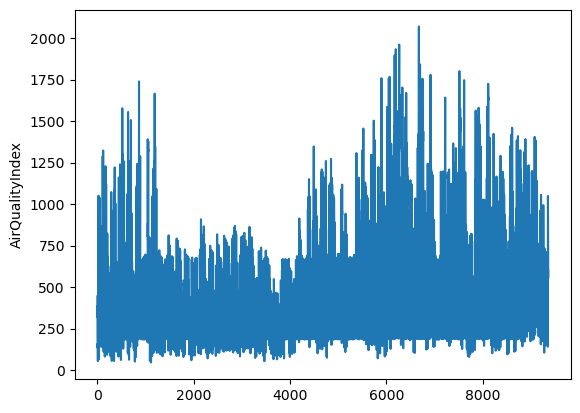

In [362]:
# Visualize the AirQualityIndex to see the highest airqiality index
sns.lineplot(task2_df['AirQualityIndex'])

From the graph we can easily define the AirQualityLabel according to the AirQualityIndex. So for this the following code execute.

In [363]:
#Assiging different categorical label fo air quality levels
def qualitylabel(value):
    if value <= 200:
        return 0  # Good
    elif 200 < value <= 700:
        return 1  # Moderate
    elif 700 < value <= 1000:
        return 2  # Unhealthy for Sensitive Groups
    elif 1000 < value <= 1300:
        return 3  # Unhealthy
    elif 1300 < value <= 1500:
        return 4  # Very Unhealthy
    else:
        return 5  # Hazardous


task2_df['AirQualityLabel'] = task2_df['AirQualityIndex'].apply(qualitylabel)

In [364]:
#seeing the dataframe
task2_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime,AirQualityIndex,AirQualityLabel
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,1,0,443.5,1
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,1,0,318.4,1
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,1,0,344.2,1
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,1,0,385.4,1
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,1,0,306.1,1


Now its time to drop those values which are not required for this task. As mentioned in the question to remove all the ground truth values, those value will be removed along with the date and also the AirQualityIndex values. Here we only use AIrQualityLabel values to train the model and predict the values.

In [365]:
#dropping unwanted variables
task2_df = task2_df.drop(columns=['Date','CO(GT)', 'NMHC(GT)','C6H6(GT)', 'NOx(GT)','NO2(GT)', 'AirQualityIndex'])

### Data Segregation

Here the time filed can not be directly passed to predit the model, so for that changing time values into the hour value only and droping of Time variable from the dataframe.

In [366]:
# Creating a new variable Hour which take only the  hour value from the Time variable
task2_df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

#droping time column
task2_df = task2_df.drop('Time',axis=1)

#output of new dataframe
task2_df.head(1)

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime,AirQualityLabel,Hour
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,1,0,1,18


#### Data Encoding

In our dataframe DayOfWeek variable is categorical data so before putting our data into the machine learning training and testing phase so to change it into the numeric forms run the following code.

In [367]:
#encoding of data from DayofWeek Variables
task2_encoding = ["DayOfWeek"]
for f in task1_encoding:
    task2_encoded = pd.get_dummies(task2_df[f], prefix=f)
    task2_df = pd.concat([task2_df, task2_encoded], axis=1)
    task2_df = task2_df.drop(columns=[f])

This code uses is used to convert categorical data in the "DayOfWeek" column into binary columns, creating dummy variables for each unique value. The original "DayOfWeek" column is then dropped, leaving the dataframe task2_df with the encoded representation of days of the week.

In [368]:
#selecting the column that start with DayOfWeek
task2_encoded_columns = task2_df.columns[task2_df.columns.str.startswith("DayOfWeek")]

# Convert only the one-hot encoded columns to integers
task2_df[task2_encoded_columns] = task2_df[task1_encoded_columns].astype(int)

This code is used to select the column in our dataframe that start with letter DayOfWeek and change the booleans values into integer value.

In [369]:
task2_df.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,PeakTime,ValleyTime,AirQualityLabel,Hour,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,1,0,1,18,0,0,0,0,0,0,1
1,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,1,0,1,19,0,0,0,0,0,0,1
2,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,1,0,1,20,0,0,0,0,0,0,1
3,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,1,0,1,21,0,0,0,0,0,0,1
4,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,1,0,1,22,0,0,0,0,0,0,1


#### Data Splitting

Data splitting is process of splitting dataframe into two parts, where one part is for tranning the model and another is for testing the model. But before splitting the dataframe we have to decide which have to be the taget variable. So for this run the following code:

In [370]:
# Deciding the target variables 
x2 = task2_df.drop(columns=['AirQualityLabel'])
y2 = task2_df['AirQualityLabel']

This code separates a dataframe task2_df into two parts. The variable x2 contains all the columns of task2_df except for 'AirQualityLabel', and the variable y2, on the other hand, specifically holds the values from the 'AirQualityLabel' column, creating a target variable for a model.

For splitting the data into testing and traning phase here we used the 'train_test_split' function from the 'model_selection' modules within the scikit_learn library which we already import at first phase of the work.

In [371]:
# Deciding the testing and training data 
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)

This code uses the train_test_split function from a machine learning library scikit-learn. It splits the dataset into training and testing sets for both features (x2) and target variables (y2). The test_size parameter indicates that 20% of the data will be used for testing.

## 5. Model definition and training


### Decision Tree Classifier Model
Desision Tree Classifer model is a machine learning model used for the classification task. This model split the dataset into the subsets based on the most unique attribute at each step. And this model used to predicit discrete class labels.

### Training And Testing

First the model will train by using the training values and with the helps of those value it will used to predict the value for testing. Here we are using classifier Decision tree.

In [372]:
# Training model with the help of DecisionTreeClassifier model
task2_model = DecisionTreeClassifier( criterion ='gini', random_state = 100, max_depth = None, min_samples_leaf = 1)
task2_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=100)

The above mentioned code initialize the decision tree classifer with specified parametes like criterion, random_state, max_depth and min_samples_leaf, assigns it to the variables task2_model, and then fits the model into the training data that is x_train and y_train.

In [373]:
#making prediction using testing set
y_predictions2 = task2_model.predict(x_test)

This code takes the trained "task2_model," which is a decision tree classifer model, and uses it to make predictions on a set of input features represented by x_test. The predict method is applied to the model, and the resulting y_predictions2 variable stores the predicted output values corresponding to the input features in x_test. Essentially, it's using the trained model to estimate what the model believes the output would be for the given test inputs

## 6. Model evaluation


### Evaluation of Model
By the following the evaluation of model can be done

In [374]:
# Evaluating the model by showing the accuracy score 
accuracy = accuracy_score(y_test, y_predictions2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7895299145299145


After making predictions (y_predictions2), this code calculates the accuracy of the model's predictions by comparing them to the actual labels (y_test). The accuracy_score function is likely used for this purpose. then, it prints the accuracy value. Accuracy is a measure of how well the model's predictions match the actual outcomes.

### Confusion Matrix

In [375]:
# Displaying the model performance  in matrix forms
print(confusion_matrix(y_test, y_predictions2))
print(classification_report(y_test, y_predictions2))

[[ 234   42    0    0    0    0]
 [  57 1041   93   12    2    1]
 [   0   75  136   18    1    0]
 [   0   17   28   48   15    3]
 [   0    1    0    9   12    5]
 [   0    2    3    4    6    7]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       276
           1       0.88      0.86      0.87      1206
           2       0.52      0.59      0.56       230
           3       0.53      0.43      0.48       111
           4       0.33      0.44      0.38        27
           5       0.44      0.32      0.37        22

    accuracy                           0.79      1872
   macro avg       0.58      0.58      0.58      1872
weighted avg       0.79      0.79      0.79      1872



These lines of code provide additional evaluation metrics for the model's performance:
1. **confusion_matrix(y_test, y_predictions2)** : This prints a confusion matrix, which is a table showing the number of true positive, true negative, false positive, and false negative predictions. It helps in understanding the model's performance on each class.
2. **classification_report(y_test, y_predictions2)** : This prints a comprehensive report including precision, recall, F1-score, and support for each class. It gives more detailed insights into the model's performance across different classes, beyond just accuracy.

# 7. Conclusions


In conclusion, this report provide two distinct objective related to the air quality prediction. 
1. In First Task: The main aim of this task is predict the CO concentration with the helps of raw sensor data from sensor device and other variable like data, time, temperature, and humidity. To complete this task a powerfull machine learning modle is used that is Decision Tree regressior model which is a part of regression learning. The main reason for chossing this module is due to the target variables are in continious data form. The result of the prediction show as (Decision Tree Mean Squared Error)  0.7739531027421652. 

2. In Second Task: The main aim of this task is predict the air quality index with the helps of raw sensor data from sensor device and other variable like data, time, temperature, and humidity. But first we have to decide the air quality index by formulating own formula. To formulating this air quality index different five ground truth values were used. After that this value is label as the uniques number like 0,1,2,3,4,5 which means good, moderate, unhealthy for sensitive groups, unhealthy, very unhealthy, and hazardous and store it into the new variables 'AirQualityLabel'. And later stage the model was trained to predict this 'AirQualityLabel' with the help of Decision tree classifer model. Here Decision tree classifer model is used becasue the target variable is in categorical forms. The result of the prediction show as (accuracy )  0.8082264957264957.


--- 



Sources:
- Air Quality Dataset : https://archive.ics.uci.edu/dataset/360/air+quality
- Pandas Documentation : https://pandas.pydata.org/docs/
- NumPy Documentation : https://numpy.org/doc/
- Seaborn Documentation : https://seaborn.pydata.org/
- Scikit Documentation : https://scikit-learn.org/0.21/documentation.html
- Machine Learning : https://www.w3schools.com/python/python_ml_getting_started.asp
- Titanic [EDA] + Model Pipeline + Keras NN : https://www.kaggle.com/code/kabure/titanic-eda-model-pipeline-keras-nn
- Custom Machine Learning Pipeline : https://www.kaggle.com/code/seneralkan/custom-machine-learning-pipeline
- Decision Tree Algorithm in Machine Learning Using Sklearnn : https://intellipaat.com/blog/decision-tree-algorithm-in-machine-learning/
- Decision Trees & Random Forest for Beginners : https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners
